In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df_SP = pd.read_csv('GSPC_historico.csv')

print(df_SP.head())

                        Date       Open       High        Low      Close  \
0  1927-12-30 00:00:00-05:00  17.660000  17.660000  17.660000  17.660000   
1  1928-01-03 00:00:00-05:00  17.760000  17.760000  17.760000  17.760000   
2  1928-01-04 00:00:00-05:00  17.719999  17.719999  17.719999  17.719999   
3  1928-01-05 00:00:00-05:00  17.549999  17.549999  17.549999  17.549999   
4  1928-01-06 00:00:00-05:00  17.660000  17.660000  17.660000  17.660000   

   Volume  Dividends  Stock Splits  
0       0        0.0           0.0  
1       0        0.0           0.0  
2       0        0.0           0.0  
3       0        0.0           0.0  
4       0        0.0           0.0  


Tipo de 'Date': datetime64[ns]
15548   1990-01-02 05:00:00
15549   1990-01-03 05:00:00
15550   1990-01-04 05:00:00
15551   1990-01-05 05:00:00
15552   1990-01-08 05:00:00
Name: Date, dtype: datetime64[ns]
El DataFrame df_SP se ha guardado como 'df_SP.csv'.


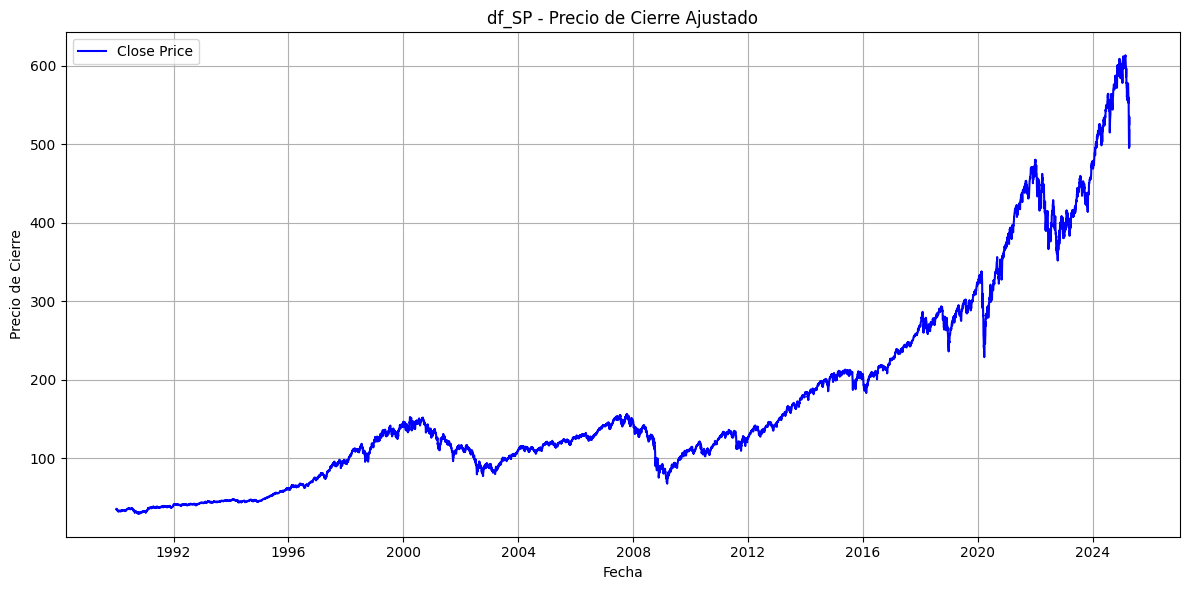

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
df_SP = pd.read_csv('GSPC_historico.csv')

# Eliminar las tres últimas columnas del DataFrame
df_SP = df_SP.iloc[:, :-2]

# Renombrar las columnas
df_SP.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Eliminar las filas 0 y 1
df_SP = df_SP.drop([0, 1]).reset_index(drop=True)

# Convertir la columna 'Date' a datetime forzando el uso de UTC
df_SP['Date'] = pd.to_datetime(df_SP['Date'], errors='coerce', utc=True)

# Convertir los datetimes *tz-aware* a datetimes *naive* (sin zona horaria)
df_SP['Date'] = df_SP['Date'].dt.tz_convert(None)

# Filtrar los valores desde 1980 en adelante
df_SP = df_SP[df_SP['Date'] >= '1990-01-01']

# Función para limpiar y escalar los valores numéricos
def clean_and_scale(value):
    # Eliminar separadores de miles (puntos y comas)
    value = str(value).replace('.', '').replace(',', '')
    # Convertir a float
    value = float(value)
    # Escalar el valor para que tenga solo tres números enteros
    while value >= 1000:  
        value /= 10
    # Si el valor escalado es menor a 100, reducirlo según tu lógica
    if value < 100:
        value /= 10
    return round(value, 2)

# Aplicar la función a las columnas numéricas
for col in ['Close', 'High', 'Low', 'Open']:
    df_SP[col] = df_SP[col].apply(clean_and_scale)

# Condición final:
# Para filas anteriores al año 2016, si en las columnas Open, High, Low o Close el valor es superior a 250, se divide entre 10.
mask = df_SP['Date'] < pd.to_datetime("2013-01-01")
for col in ['Open', 'High', 'Low', 'Close']:
    df_SP.loc[mask & (df_SP[col] > 200), col] = df_SP.loc[mask & (df_SP[col] > 200), col] / 10

# Verificar la conversión de 'Date'
print("Tipo de 'Date':", df_SP['Date'].dtype)
print(df_SP['Date'].head())

# Guardar el DataFrame en un archivo CSV
df_SP.to_csv("df_SP.csv", sep=';', decimal=',', index=False, encoding='utf-8')
print("El DataFrame df_SP se ha guardado como 'df_SP.csv'.")

# Graficar el precio de cierre (Close) a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_SP['Date'], df_SP['Close'], label='Close Price', color='blue')
plt.title('df_SP - Precio de Cierre Ajustado')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()